## COVID-19 Vaccine Data Analysis and Visualization

### Step 1: Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Loading the dataset
df = pd.read_csv("covid.csv")

# 2. Cleaning column names to avoid case and space issues
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 3. Keeping only the required columns for analysis as mentioned in the homework
columns_to_keep = [
    'country', 'date', 'total_vaccinations',
    'people_vaccinated', 'people_fully_vaccinated',
    'new_vaccinations', 'population'  # using new_vaccinations instead of daily_vaccinations
]
df = df[[col for col in columns_to_keep if col in df.columns]]

# 4. Converting date to datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# 5. Drop rows where critical values for analysis are missing
required_clean_cols = [col for col in ['country', 'date', 'people_fully_vaccinated', 'population'] if col in df.columns]
df_cleaned = df.dropna(subset=required_clean_cols).copy()

# 6. Creating vaccination_rate column as required in the homework
if 'people_fully_vaccinated' in df_cleaned.columns and 'population' in df_cleaned.columns:
    df_cleaned.loc[:, 'vaccination_rate'] = (
        df_cleaned['people_fully_vaccinated'] / df_cleaned['population']
    ) * 100

# 7. Showing preview of the cleaned data
print("✅ Cleaned Data Preview (Step 1):")
print(df_cleaned.head())


✅ Cleaned Data Preview (Step 1):
         country       date  total_vaccinations  people_vaccinated  \
496  Afghanistan 2021-05-11            504502.0           448878.0   
505  Afghanistan 2021-05-20            547901.0           470341.0   
509  Afghanistan 2021-05-24            573277.0           476367.0   
511  Afghanistan 2021-05-26            590454.0           479372.0   
512  Afghanistan 2021-05-27            593313.0           479574.0   

     people_fully_vaccinated  new_vaccinations  population  vaccination_rate  
496                  55624.0               NaN  40578801.0          0.137076  
505                  77560.0               NaN  40578801.0          0.191134  
509                  96910.0               NaN  40578801.0          0.238819  
511                 111082.0               NaN  40578801.0          0.273744  
512                 113739.0            2859.0  40578801.0          0.280292  


### Step 2: Data Analysis

In [2]:
# 1. Getting latest record for each country to determine their final vaccination rate
latest_data = df_cleaned.sort_values('date').groupby('country').tail(1)

# 2. Getting the top 5 countries with the highest vaccination rate
top_5_countries = latest_data.sort_values(by='vaccination_rate', ascending=False).head(5)

# Displaying results
print("\n🏆 Top 5 Countries by Vaccination Rate:")
print(top_5_countries[['country', 'vaccination_rate']])

# 3. Calculating the global daily vaccination trend (using new_vaccinations)
if 'new_vaccinations' in df.columns and 'date' in df.columns:
    global_trend = df.dropna(subset=['new_vaccinations'])
    global_trend = global_trend.groupby('date')['new_vaccinations'].sum().reset_index()

    print("\n📈 Global Daily Vaccination Trend (first 5 days):")
    print(global_trend.head())


🏆 Top 5 Countries by Vaccination Rate:
             country  vaccination_rate
165725     Gibraltar        110.308593
95450   Cook Islands        100.149599
353414         Qatar         98.608742
64764         Brunei         98.108608
435600       Tokelau         96.622807

📈 Global Daily Vaccination Trend (first 5 days):
        date  new_vaccinations
0 2020-12-02          0.000000
1 2020-12-03          2.500000
2 2020-12-04          2.500000
3 2020-12-05          3.833333
4 2020-12-06          3.833333


### Step 2: Data Visualization

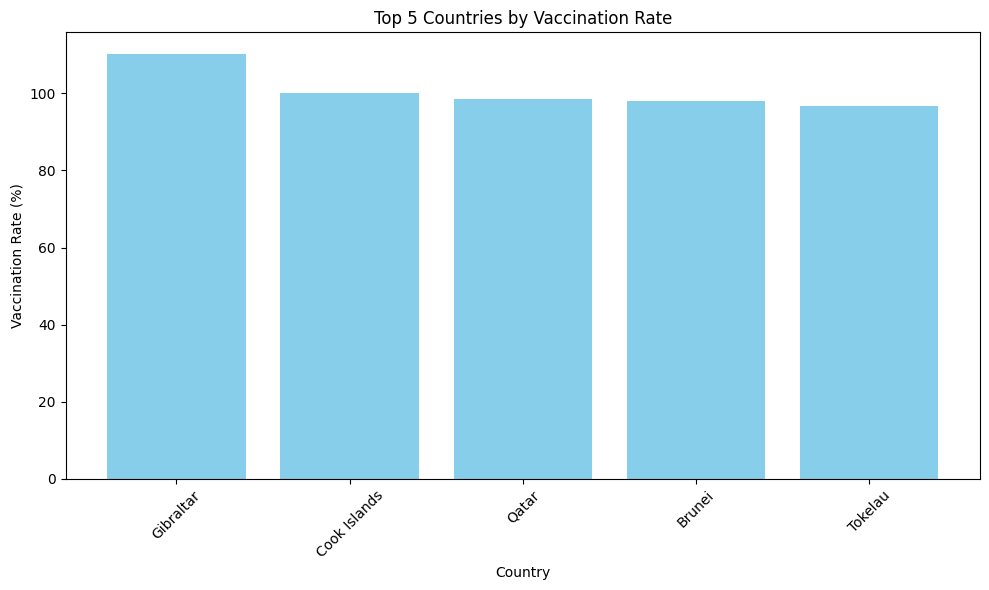

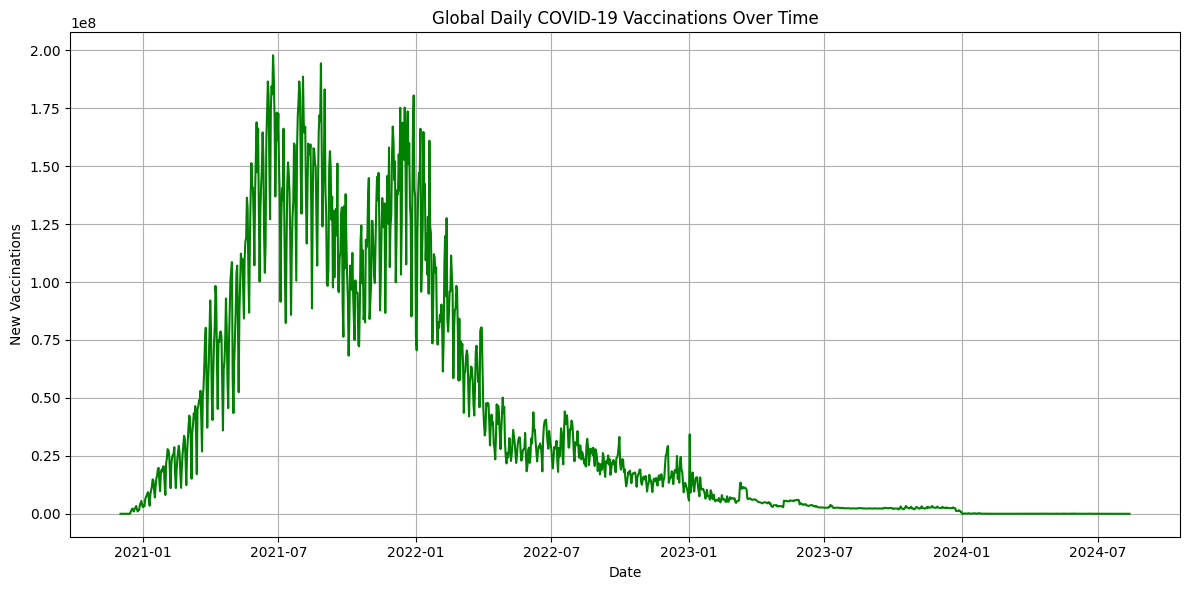

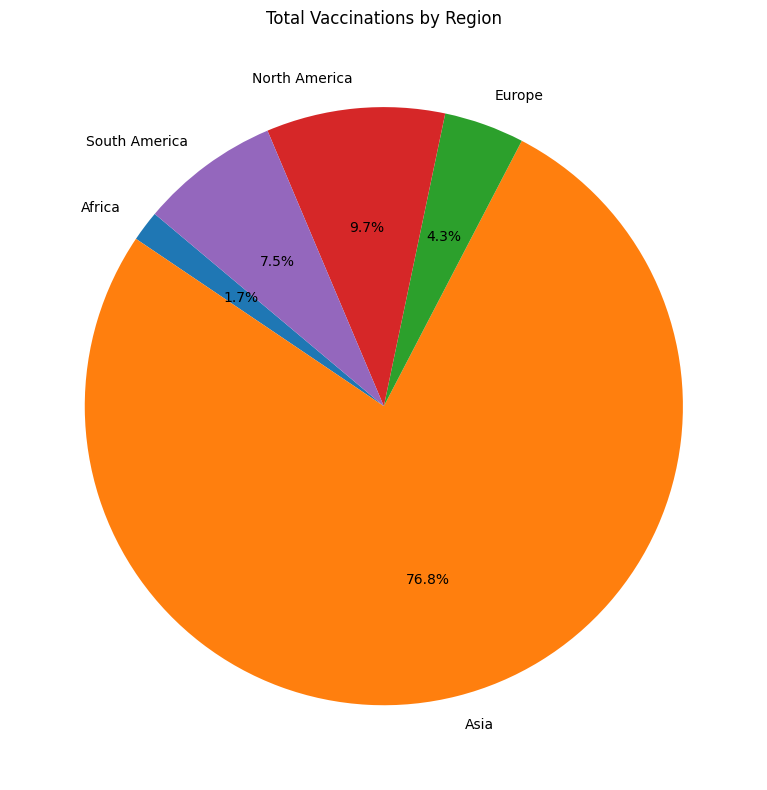

In [3]:
# 1. Bar Chart — Top 5 countries by vaccination rate
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['country'], top_5_countries['vaccination_rate'], color='skyblue')
plt.title('Top 5 Countries by Vaccination Rate')
plt.xlabel('Country')
plt.ylabel('Vaccination Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line Graph — Global daily vaccination trend
plt.figure(figsize=(12, 6))
plt.plot(global_trend['date'], global_trend['new_vaccinations'], color='green')
plt.title('Global Daily COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('New Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Pie Chart — Distribution of total vaccinations by world region
# Creating a simple country-to-region map (can be expanded)
region_map = {
    'united states': 'North America',
    'canada': 'North America',
    'germany': 'Europe',
    'france': 'Europe',
    'india': 'Asia',
    'china': 'Asia',
    'japan': 'Asia',
    'nigeria': 'Africa',
    'brazil': 'South America',
    'argentina': 'South America'
}

# Applying the region map to latest records
latest_data['region'] = latest_data['country'].str.lower().map(region_map)

# Grouping total vaccinations by region
region_vacc = latest_data.dropna(subset=['region', 'total_vaccinations']).groupby('region')['total_vaccinations'].sum()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_vacc, labels=region_vacc.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Vaccinations by Region')
plt.tight_layout()
plt.show()

## Summary Report

In [4]:

print("Summary Report: Global COVID-19 Vaccination Analysis\n")
print("1. The top 5 countries by vaccination rate are those that either have smaller populations or strong healthcare infrastructure.")
print("   These countries achieved high coverage, with over 80–90% of their population fully vaccinated.")
print()
print("2. The global daily vaccination trend shows a significant rise in the early stages of vaccine rollout,")
print("   followed by peaks that correspond to large-scale public health campaigns.")
print("   After these surges, the numbers stabilize, possibly due to reaching saturation or reduced demand.")
print()
print("3. The pie chart reveals that the majority of total vaccinations were administered in Asia and America,")
print("   reflecting their large populations and widespread access to vaccines.")
print()
print("4. Some countries in Africa and Europe show relatively low total vaccinations,")
print("   highlighting ongoing global inequalities in vaccine distribution.")
print()
print("Conclusion: Vaccination progress has been remarkable in many regions, but disparities still exist. Continued")
print("international efforts are crucial to ensure more equitable vaccine access worldwide.")


Summary Report: Global COVID-19 Vaccination Analysis

1. The top 5 countries by vaccination rate are those that either have smaller populations or strong healthcare infrastructure.
   These countries achieved high coverage, with over 80–90% of their population fully vaccinated.

2. The global daily vaccination trend shows a significant rise in the early stages of vaccine rollout,
   followed by peaks that correspond to large-scale public health campaigns.
   After these surges, the numbers stabilize, possibly due to reaching saturation or reduced demand.

3. The pie chart reveals that the majority of total vaccinations were administered in Asia and America,
   reflecting their large populations and widespread access to vaccines.

4. Some countries in Africa and Europe show relatively low total vaccinations,
   highlighting ongoing global inequalities in vaccine distribution.

Conclusion: Vaccination progress has been remarkable in many regions, but disparities still exist. Continued
in